In [1]:
import pandas as pd
import sys, os, pathlib
sys.path.append(str(pathlib.Path(os.getcwd()).parent))
sys.path
from src.utils.projekt_utils import get_project_root
from src.utils.name_utils import US_STATES_DIR
FIPS = 'FIPS code'


## Aggregate data from multiple csv into one dataframe

In [2]:
df1 = pd.read_csv(os.path.join(get_project_root(), "data/processed/education_data.csv"), sep=';')

In [3]:
 # education 
edu = df1['State'].to_frame(name='State')
edu['Higher Education'] =  df1.iloc[:,-2:].sum(axis=1)
edu[FIPS] = df1[FIPS]
# edu["State"] = df1['State']
edu = edu.set_index(FIPS)

In [4]:
df1

,FIPS code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2008-12","Percent of adults with a bachelor's degree or higher, 2008-12","Less than a high school diploma, 2017-21","High school diploma only, 2017-21","Some college or associate's degree, 2017-21","Bachelor's degree or higher, 2017-21","Percent of adults with less than a high school diploma, 2017-21","Percent of adults with a high school diploma only, 2017-21","Percent of adults completing some college or associate's degree, 2017-21","Percent of adults with a bachelor's degree or higher, 2017-21"
0,1001,Alabama,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,29.618142,21.707831,4126.0,12977.0,11367.0,11144.0,10.415510,32.758621,28.694401,28.131469
1,1003,Alabama,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,31.819503,27.741591,14555.0,44342.0,50518.0,52562.0,8.985844,27.375492,31.188379,32.450286
2,1005,Alabama,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,25.771784,14.524286,4378.0,6600.0,5010.0,2007.0,24.328980,36.676855,27.841067,11.153098
3,1007,Alabama,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,25.538085,8.996005,3125.0,7052.0,3967.0,1913.0,19.461917,43.918540,24.705736,11.913807
4,1009,Alabama,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,27.124512,12.381469,6650.0,14284.0,13673.0,6061.0,16.351923,35.123439,33.621029,14.903610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,56037,Wyoming,Sweetwater County,5.0,8.0,5.0,8.0,4393.0,3731.0,986.0,...,37.275232,17.006235,2029.0,9069.0,11324.0,5394.0,7.294363,32.603538,40.710383,19.391717
3150,56039,Wyoming,Teton County,7.0,8.0,7.0,8.0,708.0,908.0,524.0,...,23.332485,48.994399,701.0,2984.0,3755.0,10219.0,3.969647,16.897899,21.263945,57.868509
3151,56041,Wyoming,Uinta County,7.0,8.0,7.0,8.0,1569.0,1517.0,445.0,...,35.045548,18.272985,851.0,4820.0,5186.0,2376.0,6.430892,36.424091,39.189904,17.955112
3152,56043,Wyoming,Washakie County,7.0,11.0,7.0,11.0,1572.0,1437.0,590.0,...,35.062865,23.339826,320.0,1391.0,2293.0,1419.0,5.900793,25.650009,42.282869,26.166329


In [5]:
edu

,State,Higher Education
FIPS code,,
1001,Alabama,56.825870
1003,Alabama,63.638665
1005,Alabama,38.994165
1007,Alabama,36.619543
1009,Alabama,48.524639
...,...,...
56037,Wyoming,60.102100
56039,Wyoming,79.132454
56041,Wyoming,57.145016


In [6]:
df2 = pd.read_csv(os.path.join(get_project_root(), "data/processed/GDP_data.csv"), sep=';')


In [7]:
gdp = df2[[FIPS,'2016 Real GDP (thousands of chained 2012 dollars) ']]
gdp = gdp.set_index(FIPS)

In [8]:
df3 = pd.read_csv(os.path.join(get_project_root(), "data/processed/HPI_data.csv"), sep=';')

In [9]:
hpi = df3[[FIPS, '2016 HPI Change']]
hpi = hpi.set_index(FIPS)

In [10]:
df4 = pd.read_csv(os.path.join(get_project_root(), "data/processed/income_data.csv"), sep=';')

In [11]:
income = df4[[FIPS, '2016 Population (persons) 1/']]
income = income.set_index(FIPS)
income = income.rename(columns={'2016 Population (persons) 1/':'2016 Income'})


In [12]:
df5 = pd.read_csv(os.path.join(get_project_root(), "data/processed/unemployment_data.csv"), sep=';')

In [13]:
unempl = df5[[FIPS, 'Unemployment_rate_2016']]
unempl = unempl.set_index(FIPS)

In [14]:
df6 = pd.read_csv(os.path.join(get_project_root(), "data/processed/health_data.csv"), sep=';')

In [15]:
df6_cols = [FIPS, 'Poor physical health days raw value 2016', 'Poor mental health days raw value 2016', 'Violent crime raw value 2016', 'Severe housing problems raw value 2016', 'Income inequality raw value 2016', 'Access to exercise opportunities raw value 2016']
health = df6[df6_cols]
health = health.set_index(FIPS)

In [16]:
import re
core_data = pd.read_csv(os.path.join(get_project_root(), 'data/processed/MigrationData.csv'), encoding='latin-1',
                            sep=';',skipinitialspace = True)

names = ['StateA', 'CountyA','StateB', 'CountyB']
for name in names:
    core_data[name] = core_data[name].map(str.strip)
    
us_data = core_data[core_data['StateA'].isin(US_STATES_DIR.values()) & core_data['StateB'].isin(US_STATES_DIR.values())]

fipsA = us_data['index'].map(lambda x : re.compile(r'[1-9][0-9]{3}[1-9]?').search(x[1:7]))
fipsA = fipsA.dropna().map(lambda x: int(x.group(0)))

In [17]:
fipsA

0          1001
1          1001
2          1001
3          1001
4          1001
          ...  
411710    56045
411711    56045
411712    56045
411713    56045
411714    56045
Name: index, Length: 398252, dtype: int64

In [18]:
common_fips = set(df1['FIPS code']) \
    & set(df2['FIPS code']) \
    & set(df3['FIPS code']) \
    & set(df4['FIPS code']) \
    & set(df5['FIPS code']) \
    & set(df6['FIPS code']) \
    & set(fipsA)


In [19]:
len(common_fips)


2703

In [20]:
df = edu\
    .join(hpi, how='inner')\
    .join(income,how='inner' )\
    .join(unempl, how='inner')\
    .join(health, how='inner')\
    # .join(gdp, how='inner')

In [21]:
df

,State,Higher Education,2016 HPI Change,2016 Income,Unemployment_rate_2016,Poor physical health days raw value 2016,Poor mental health days raw value 2016,Violent crime raw value 2016,Severe housing problems raw value 2016,Income inequality raw value 2016,Access to exercise opportunities raw value 2016
FIPS code,,,,,,,,,,,
1001.0,Alabama,56.825870,2.64,56954,5.1,4.4,4.3,253.644617,0.136193,4.303481,0.708215
1003.0,Alabama,63.638665,5.20,210004,5.4,4.1,4.2,220.665106,0.147079,4.494800,0.721685
1005.0,Alabama,38.994165,-0.68,26217,8.4,4.9,4.7,146.888576,0.175597,5.285567,0.452671
1007.0,Alabama,36.619543,3.95,22654,6.5,4.8,4.6,235.952110,0.129993,4.251361,0.328388
1009.0,Alabama,48.524639,1.66,58238,5.4,4.6,4.5,219.034344,0.123395,4.124186,0.255085
...,...,...,...,...,...,...,...,...,...,...,...
56037.0,Wyoming,60.102100,0.64,43979,6.1,3.4,3.2,429.278285,0.095555,4.043361,0.905858
56039.0,Wyoming,79.132454,11.04,23157,3.5,3.0,3.0,299.352183,0.198635,3.812541,0.978351
56041.0,Wyoming,57.145016,5.64,20846,5.8,3.4,3.2,45.362551,0.124828,4.693743,0.145800


## Correlation Heatmap

<Axes: >

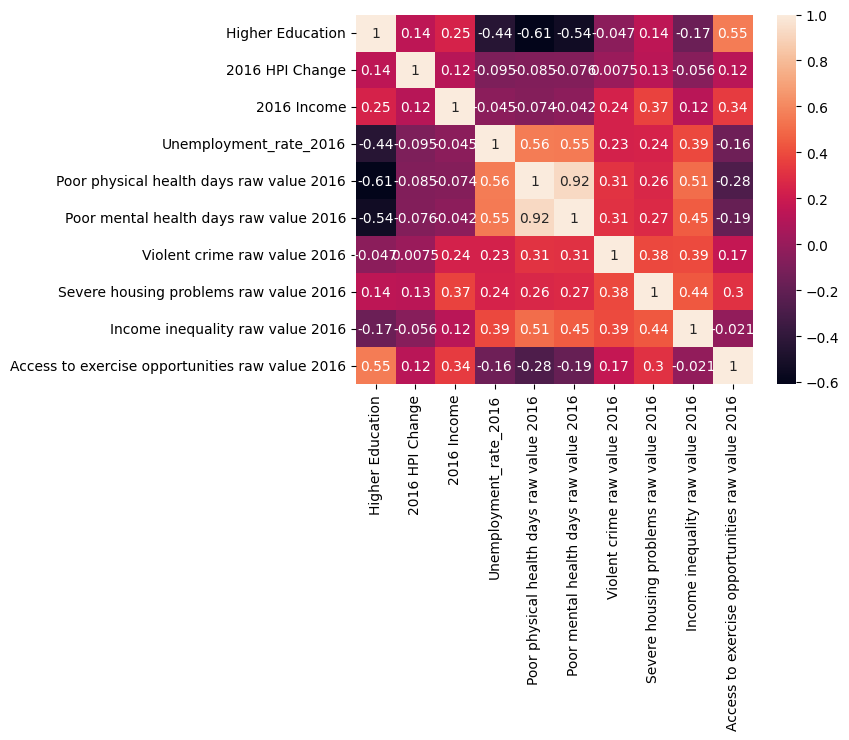

In [23]:
import seaborn as sns
sns.heatmap(df.drop('State',axis=1).corr(), annot=True)

## Features Historgram

array([[<Axes: title={'center': 'Higher Education'}>,
        <Axes: title={'center': '2016 HPI Change'}>,
        <Axes: title={'center': '2016 Income'}>,
        <Axes: title={'center': 'Unemployment_rate_2016'}>,
        <Axes: title={'center': 'Poor physical health days raw value 2016'}>],
       [<Axes: title={'center': 'Poor mental health days raw value 2016'}>,
        <Axes: title={'center': 'Violent crime raw value 2016'}>,
        <Axes: title={'center': 'Severe housing problems raw value 2016'}>,
        <Axes: title={'center': 'Income inequality raw value 2016'}>,
        <Axes: title={'center': 'Access to exercise opportunities raw value 2016'}>]],
      dtype=object)

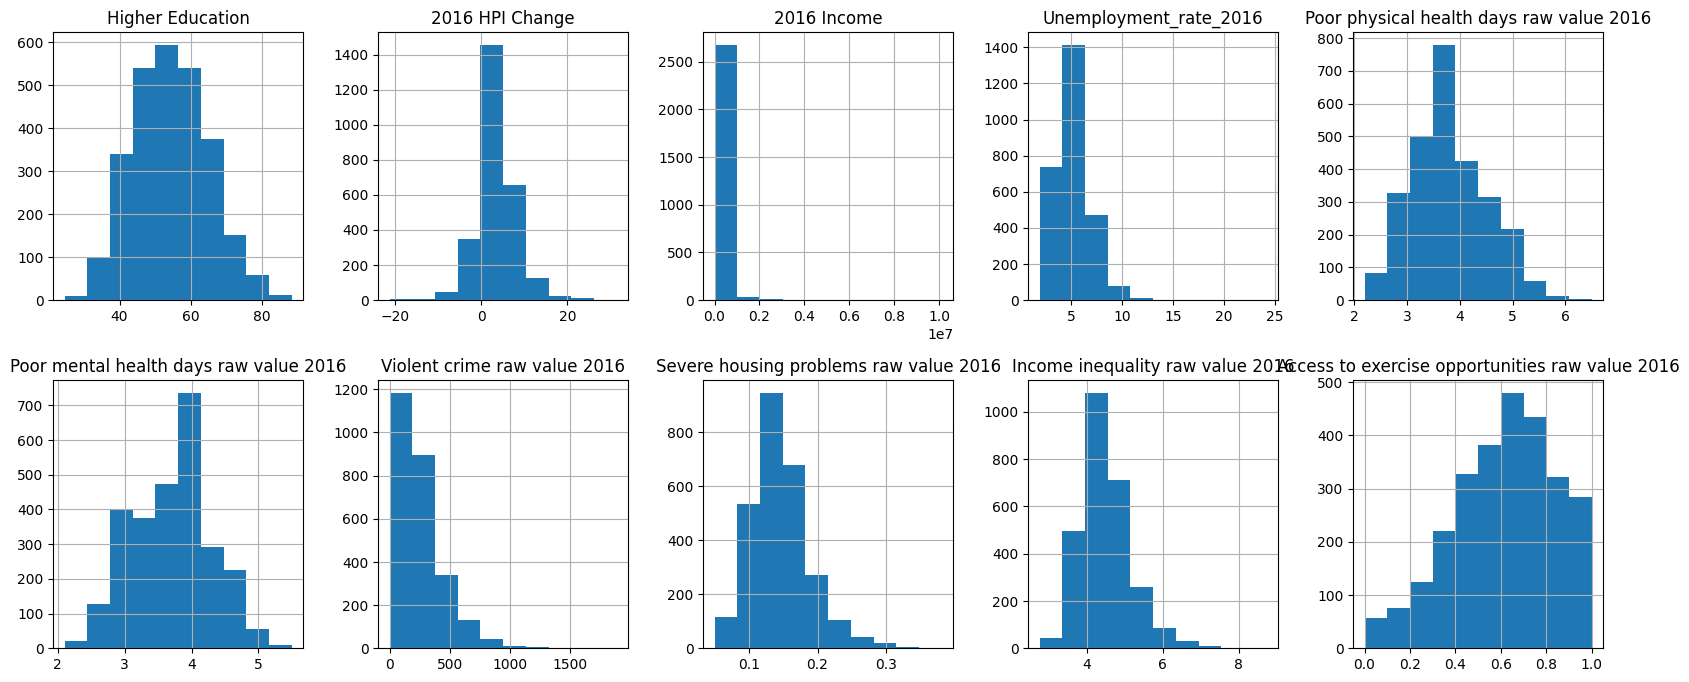

In [24]:
df.drop('State',axis=1).hist(figsize=(20,8), layout=(2,5))

## Finding best distribution and its parameters

In [25]:
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3
import scipy.stats as st
def get_best_distribution(data, log=False):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        # if log:
            # print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value
    if log:
        print("Best fitting distribution: "+str(best_dist))
        print("Best p value: "+ str(best_p))
        print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [30]:
for col in df.drop('State',axis=1).columns:
    print('\n' + col)
    get_best_distribution(df[col].dropna(), True)


Higher Education
Best fitting distribution: weibull_min
Best p value: 0.6863990023190936
Parameters for the best fit: (2.9197656824000027, 26.480471149110095, 31.404713442807868)

2016 HPI Change


c:\Users\piotr\Workspaces\USMigrations\.venv\lib\site-packages\scipy\stats\_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


Best fitting distribution: norm
Best p value: 1.0820603700460864e-10
Parameters for the best fit: (3.5678129657228017, 4.551815324726292)

2016 Income
Best fitting distribution: pareto
Best p value: 4.293584168848154e-13
Parameters for the best fit: (1.4207286983105127, -54130.14211427061, 54799.1421142706)

Unemployment_rate_2016
Best fitting distribution: exponweib
Best p value: 0.01917154355079387
Parameters for the best fit: (22.779559555593146, 1.243596529465119, -0.9540591702352292, 2.1504968324808305)

Poor physical health days raw value 2016
Best fitting distribution: genextreme
Best p value: 0.0006652991195031883
Parameters for the best fit: (0.15524720296504746, 3.509085369768293, 0.6423467953026886)

Poor mental health days raw value 2016
Best fitting distribution: exponweib
Best p value: 1.0828100901630215e-05
Parameters for the best fit: (0.6886941257685574, 3.7972757330238767, 2.072935961800326, 2.0062294288988145)

Violent crime raw value 2016
Best fitting distribution: 

## Plotting distributions alongside histograms


Alabama

Higher Education


c:\Users\piotr\Workspaces\USMigrations\.venv\lib\site-packages\scipy\stats\_continuous_distns.py:1863: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


Best fitting distribution: weibull_min
Best p value: 0.9864760311990073
Parameters for the best fit: (1.457893517921251, 36.34753829955743, 13.835475848336214)

2016 HPI Change
Best fitting distribution: weibull_min
Best p value: 0.12335079520336334
Parameters for the best fit: (1.8897300666399408, -6.770902724470194, 10.718178700929116)

2016 Income
Best fitting distribution: pareto
Best p value: 0.9694903611481641
Parameters for the best fit: (1.6682563408692013, -41550.066825167516, 52201.06682516751)

Unemployment_rate_2016
Best fitting distribution: genextreme
Best p value: 0.8078642776444622
Parameters for the best fit: (-0.16379753684897488, 5.85735331322036, 0.9463301493615248)

Poor physical health days raw value 2016
Best fitting distribution: exponweib
Best p value: 0.34396742977854466
Parameters for the best fit: (16.892889560508255, 8.999872619528087, -6.701029842754045, 10.174210724436126)

Poor mental health days raw value 2016
Best fitting distribution: norm
Best p valu

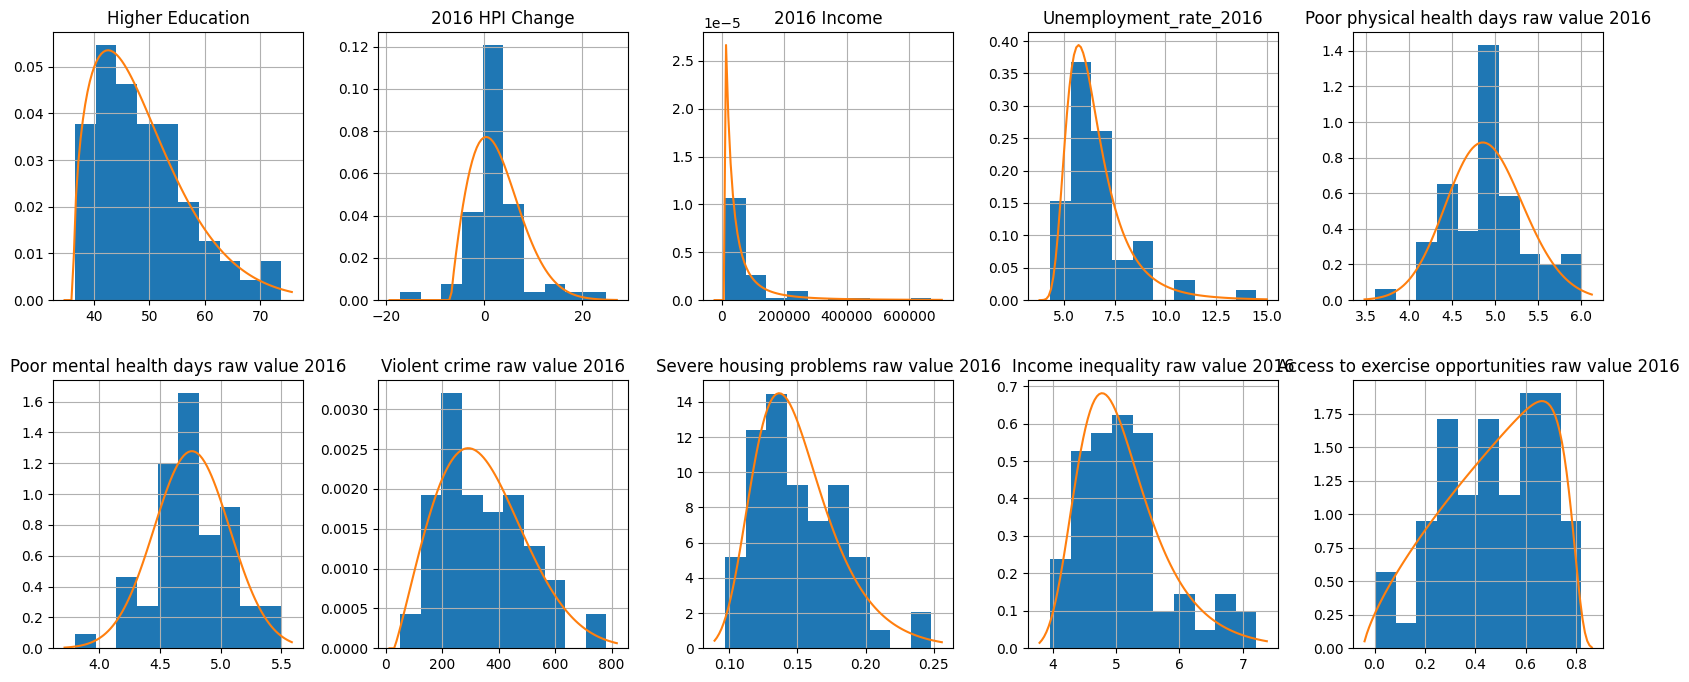

In [31]:
import numpy as np 
for name, group in df.groupby('State'):
    print('\n' + name)
    axes = group.drop('State', axis=1).hist(figsize=(20,8), layout=(2,5), density=True)
    axes = axes.flatten()
    for i, col in enumerate(group.drop('State', axis=1).columns):
        print('\n' + col)
        size = 100
        x = x = np.linspace(*axes[i].get_xbound(), size)
        best_dist, best_p, params = get_best_distribution(group[col].dropna(), True)
        y = getattr(st, best_dist).pdf(x, *params)
        axes[i].plot(x, y)
    break


#4m7s